In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# Thompson Sampling Algorithm

<img src="Thompson_Sampling_Slide.png">

In [4]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [5]:
ads_selected

[1,
 0,
 6,
 9,
 3,
 7,
 4,
 5,
 2,
 5,
 1,
 2,
 8,
 5,
 3,
 6,
 4,
 0,
 3,
 5,
 8,
 9,
 0,
 6,
 9,
 7,
 0,
 8,
 8,
 4,
 9,
 4,
 4,
 1,
 2,
 9,
 4,
 4,
 6,
 8,
 1,
 4,
 3,
 4,
 1,
 7,
 3,
 4,
 4,
 4,
 4,
 5,
 4,
 9,
 6,
 4,
 0,
 4,
 9,
 9,
 4,
 0,
 2,
 7,
 0,
 4,
 4,
 7,
 7,
 4,
 4,
 5,
 4,
 8,
 7,
 5,
 3,
 4,
 0,
 0,
 7,
 2,
 4,
 4,
 7,
 6,
 1,
 4,
 7,
 7,
 1,
 4,
 7,
 4,
 3,
 9,
 7,
 4,
 6,
 4,
 3,
 7,
 3,
 7,
 7,
 4,
 3,
 9,
 3,
 7,
 3,
 2,
 0,
 4,
 4,
 0,
 8,
 7,
 8,
 3,
 7,
 1,
 6,
 0,
 7,
 4,
 6,
 2,
 8,
 4,
 0,
 7,
 7,
 9,
 7,
 2,
 7,
 2,
 7,
 9,
 7,
 4,
 7,
 5,
 7,
 4,
 3,
 8,
 9,
 1,
 4,
 7,
 3,
 1,
 1,
 4,
 8,
 8,
 6,
 7,
 1,
 7,
 4,
 1,
 5,
 7,
 4,
 0,
 7,
 5,
 7,
 1,
 1,
 7,
 7,
 8,
 4,
 1,
 4,
 1,
 8,
 1,
 4,
 1,
 9,
 7,
 4,
 7,
 0,
 1,
 1,
 1,
 1,
 4,
 8,
 0,
 0,
 3,
 7,
 7,
 0,
 4,
 1,
 4,
 8,
 8,
 4,
 0,
 0,
 1,
 0,
 4,
 3,
 0,
 1,
 7,
 7,
 7,
 8,
 4,
 4,
 3,
 4,
 2,
 0,
 7,
 7,
 0,
 0,
 0,
 7,
 0,
 6,
 0,
 7,
 8,
 0,
 8,
 7,
 1,
 6,
 8,
 3,
 6,
 7,
 4,
 0,
 7,
 0,
 1,


In [6]:
total_reward

2593

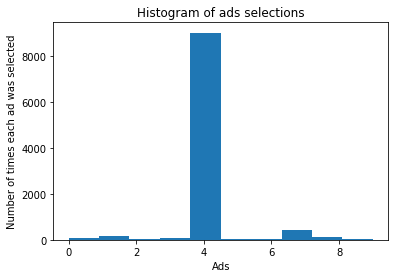

In [7]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()